# VGG--19

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = keras.utils.image_dataset_from_directory(r'/Users/vishaaldayashanker/Downloads/OnlyNew 2/New_braintumor')

# Divide the dataset into train, validation, and test sets
train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.2) + 1

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Define the VGG-19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train, epochs=50, validation_data=val)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Print final training and validation accuracies
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Found 3000 files belonging to 2 classes.


NameError: name 'Dropout' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
F1 Score: 0.8
ROC-AUC Score: 0.9841269841269842


2026-01-18 19:36:14.253536: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


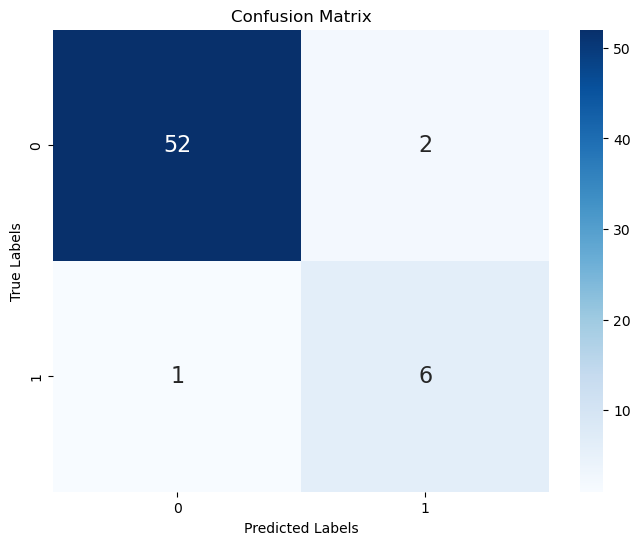

In [3]:
# Predictions
y_true_list = []
y_pred_list = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    y_true_list.append(y)
    y_pred_list.append(yhat)

y_true = np.concatenate(y_true_list, axis=0)
y_pred = np.concatenate(y_pred_list, axis=0)

# Calculate metrics
f1 = f1_score(y_true, (y_pred > 0.5).astype(int))
roc_auc = roc_auc_score(y_true, y_pred)

# Print metrics
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Calculate confusion matrix
cm = confusion_matrix(y_true, (y_pred > 0.5).astype(int))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


2026-01-18 19:37:11.115848: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


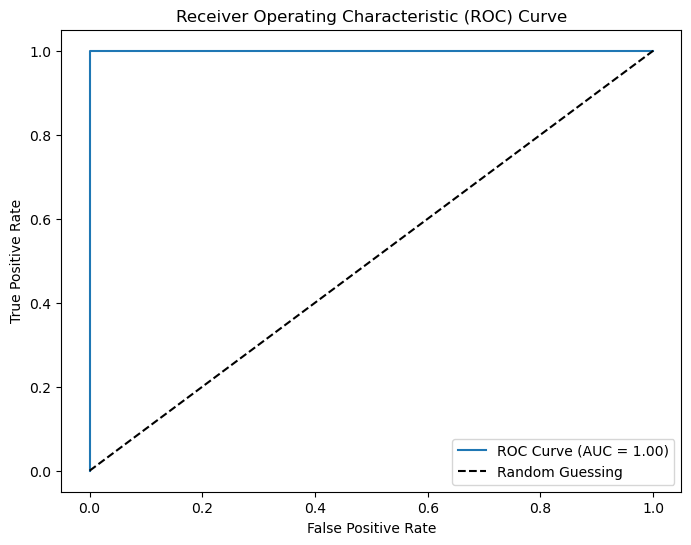

In [4]:
# Evaluate the model
bin_acc = keras.metrics.BinaryAccuracy()
recall = keras.metrics.Recall()
precision = keras.metrics.Precision()
y_true_list = []
y_pred_list = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    bin_acc.update_state(y, yhat)
    recall.update_state(y, yhat)
    precision.update_state(y, yhat)

    y_true_list.append(y)
    y_pred_list.append(yhat)

y_true = np.concatenate(y_true_list, axis=0)
y_pred = np.concatenate(y_pred_list, axis=0)

roc_auc = roc_auc_score(y_true, y_pred)
fpr, tpr, _ = roc_curve(y_true, y_pred)

# Print evaluation metrics
print("Accuracy:", bin_acc.result().numpy())
print("Recall:", recall.result().numpy())
print("Precision:", precision.result().numpy())
print("F1 Score:", f1_score(y_true, (y_pred > 0.5).astype(int)))
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [5]:
# Calculate True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
TP = np.sum((y_true == 1) & (y_pred > 0.5))
TN = np.sum((y_true == 0) & (y_pred <= 0.5))
FP = np.sum((y_true == 0) & (y_pred > 0.5))
FN = np.sum((y_true == 1) & (y_pred <= 0.5))

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 0.21311475409836064
Specificity: 0.7868852459016393


In [6]:
import os, time, math, random
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report,
    roc_curve, auc,
    precision_recall_curve, average_precision_score,
)
from sklearn.model_selection import StratifiedKFold
from scipy.stats import ttest_rel, wilcoxon


In [7]:
def get_loader_counts(loader):
    # Works for standard torch DataLoader with dataset returning (x,y)
    ys = []
    for _, y in loader:
        ys.append(y.detach().cpu().numpy())
    y = np.concatenate(ys).astype(int)
    unique, counts = np.unique(y, return_counts=True)
    return dict(zip(unique.tolist(), counts.tolist())), len(y)

def print_split_summary(train_loader=None, val_loader=None, test_loader=None, class_names=None):
    if class_names is None:
        class_names = ["class0", "class1"]
    for name, loader in [("Train", train_loader), ("Validation", val_loader), ("Test", test_loader)]:
        if loader is None:
            continue
        per_class, total = get_loader_counts(loader)
        row = {class_names[k] if k < len(class_names) else str(k): v for k, v in per_class.items()}
        print(f"{name}: total={total}, per_class={row}")

# Usage:
# print_split_summary(train_loader, val_loader, test_loader, class_names=["Normal","Tumor"])


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report,
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)

def _get_y_true_from_generator(gen):
    # Works for tf.keras.preprocessing generators and tf.data if labels available
    if hasattr(gen, "classes"):
        return gen.classes
    # If it's a tf.data.Dataset, you'll need to iterate once:
    y = []
    for _, labels in gen:
        y.append(labels.numpy())
    y = np.concatenate(y)
    # If one-hot:
    if y.ndim > 1 and y.shape[1] > 1:
        y = np.argmax(y, axis=1)
    return y.astype(int)

def _get_y_score(model, gen):
    # predicted probabilities
    y_prob = model.predict(gen, verbose=0)
    # handle shapes:
    # - binary sigmoid => (N,1) or (N,)
    # - softmax 2-class => (N,2)
    if y_prob.ndim == 2 and y_prob.shape[1] == 2:
        y_score = y_prob[:, 1]
        y_pred = np.argmax(y_prob, axis=1)
    else:
        y_score = y_prob.reshape(-1)
        y_pred = (y_score >= 0.5).astype(int)
    return y_score, y_pred

def evaluate_binary_classifier_keras(model, test_gen, model_name="VGG19", class_names=("Normal","Tumor"), save_dir=None):
    y_true = _get_y_true_from_generator(test_gen)
    y_score, y_pred = _get_y_score(model, test_gen)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n[{model_name}] Classification Report (TEST)")
    print(classification_report(y_true, y_pred, target_names=list(class_names), digits=4))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(values_format="d")
    plt.title(f"{model_name} - Confusion Matrix (TEST)")
    if save_dir:
        import os
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(f"{save_dir}/{model_name}_confusion_matrix_test.png", dpi=300, bbox_inches="tight")
    plt.show()

    # ROC
    fpr, tpr, thr = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={roc_auc:.4f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC (TEST)")
    plt.legend()
    if save_dir:
        plt.savefig(f"{save_dir}/{model_name}_roc_test.png", dpi=300, bbox_inches="tight")
    plt.show()

    # PR Curve (Comment 6)
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    ap = average_precision_score(y_true, y_score)
    plt.figure()
    plt.plot(recall, precision, label=f"AP={ap:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} - Precision-Recall (TEST)")
    plt.legend()
    if save_dir:
        plt.savefig(f"{save_dir}/{model_name}_pr_test.png", dpi=300, bbox_inches="tight")
    plt.show()

    # KS Curve (Comment 6; optional but asked)
    ks = np.max(np.abs(tpr - fpr))
    ks_thr = thr[np.argmax(np.abs(tpr - fpr))]
    plt.figure()
    plt.plot(thr, tpr, label="TPR")
    plt.plot(thr, fpr, label="FPR")
    plt.xlabel("Threshold")
    plt.ylabel("Rate")
    plt.title(f"{model_name} - KS Curve (TEST), KS={ks:.4f} at thr={ks_thr:.4f}")
    plt.legend()
    if save_dir:
        plt.savefig(f"{save_dir}/{model_name}_ks_test.png", dpi=300, bbox_inches="tight")
    plt.show()

    return {
        "model": model_name,
        "AUC": float(roc_auc),
        "AP": float(ap),
        "KS": float(ks),
        "n_test": int(len(y_true)),
        "cm": cm
    }



[VGG19] Classification Report (TEST)
              precision    recall  f1-score   support

      Normal     0.8000    0.8333    0.8163        48
       Tumor     0.2727    0.2308    0.2500        13

    accuracy                         0.7049        61
   macro avg     0.5364    0.5321    0.5332        61
weighted avg     0.6876    0.7049    0.6956        61



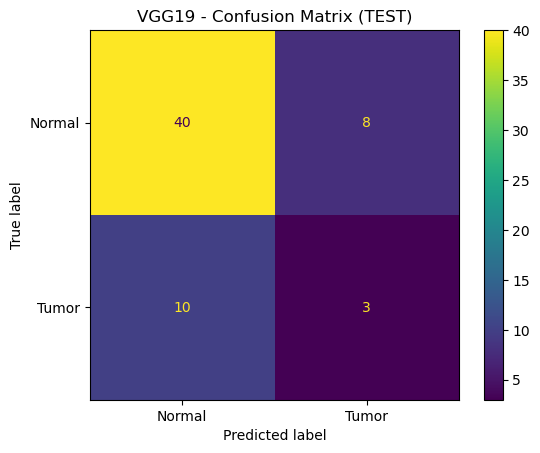

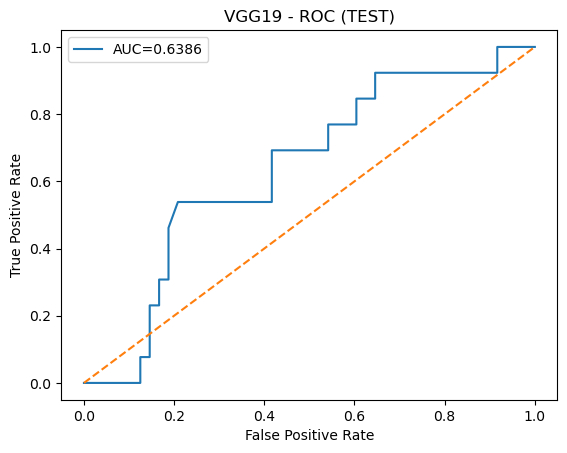

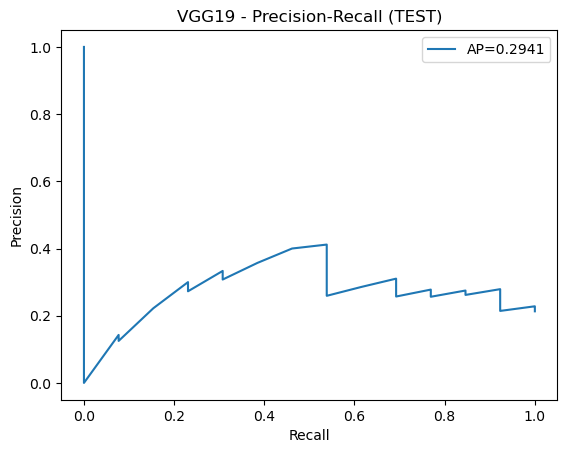

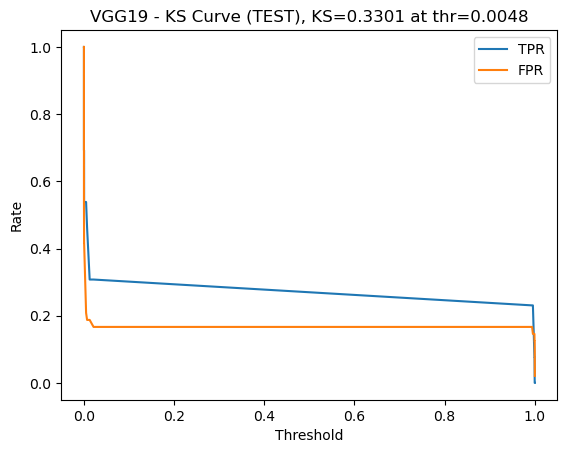

In [13]:
results_vgg = evaluate_binary_classifier_keras(
    model, test,
    model_name="VGG19",
    class_names=("Normal","Tumor"),
    save_dir="figs"
)
